In [110]:
import numpy as np
import matplotlib.pyplot as plt
from pyod.utils.data import generate_data_clusters
from pyod.models import knn, lof
from sklearn.metrics import balanced_accuracy_score
from sklearn.datasets import make_blobs
from pyod.utils.utility import standardizer
from scipy.io import loadmat
from sklearn.model_selection import train_test_split
from pyod.models.combination import average, maximization

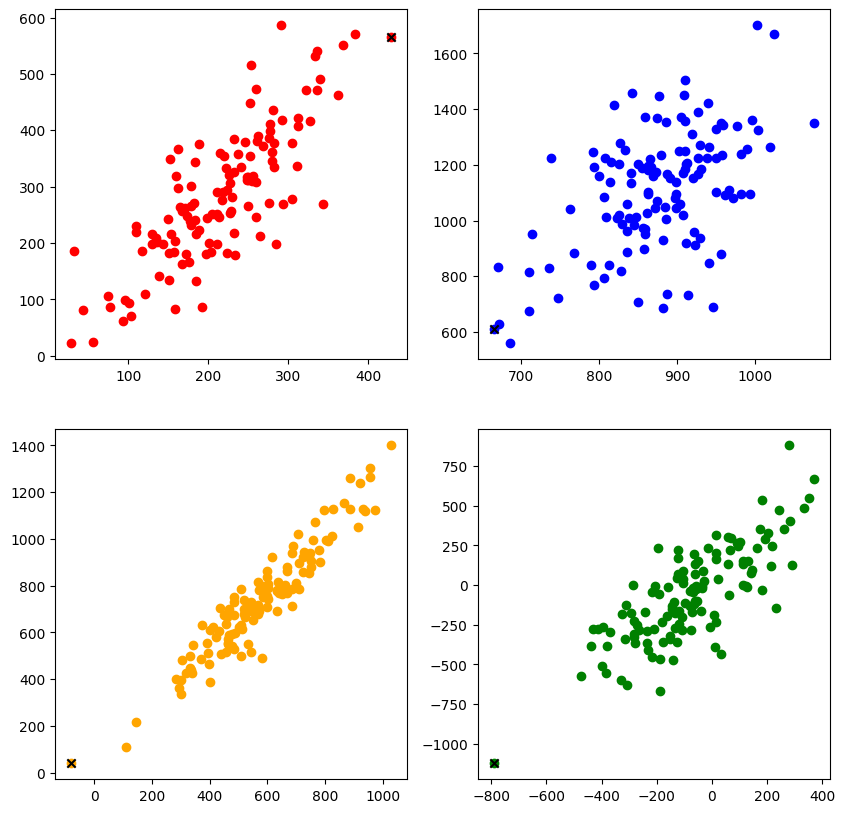

In [54]:
n = 125
def generate_x(miu, var, n):
    return np.random.normal(miu, var, n)

def generate_noisy_y(noise_var, x, a, b):
    eps = np.random.normal(0, noise_var, x.shape[0])
    return a * x + b + eps

a, b = 1.25, 21.0
miu = [213, 587, 873, -78]
low_noise_var = 75
high_noise_var = 193

x1 = generate_x(miu[0], low_noise_var, n)
y1 = generate_noisy_y(low_noise_var, x1, a, b)

x2 = generate_x(miu[1], high_noise_var, n)
y2 = generate_noisy_y(low_noise_var, x2, a, b)

x3 = generate_x(miu[2], low_noise_var, n)
y3 = generate_noisy_y(high_noise_var, x3, a, b)

x4 = generate_x(miu[3], high_noise_var, n)
y4 = generate_noisy_y(high_noise_var, x4, a, b)

def calculate_hat_matrix(x):
    X = np.column_stack((x, np.ones_like(x)))
    X1 = np.dot(X.T, X)
    Y = np.linalg.solve(X1, X.T)
    return np.dot(X, Y)

def calculate_leverage_scores(x):
    H = calculate_hat_matrix(x)
    return np.diag(H)

H1 = calculate_hat_matrix(x1)
y_hat_1 = np.dot(H1, y1)
max_lev_1 = calculate_leverage_scores(x1).argmax()

H2 = calculate_hat_matrix(x2)
y_hat_2 = np.dot(H2, y2)
max_lev_2 = calculate_leverage_scores(x2).argmax()

H3 = calculate_hat_matrix(x3)
y_hat_3 = np.dot(H3, y3)
max_lev_3 = calculate_leverage_scores(x3).argmax()

H4 = calculate_hat_matrix(x4)
y_hat_4 = np.dot(H4, y4)
max_lev_4 = calculate_leverage_scores(x4).argmax()

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs[0, 0].scatter(x1, y1, c='red')
# axs[0, 0].scatter(x1, y_hat_1, c='black')
axs[0, 0].scatter(x1[max_lev_1], y1[max_lev_1], c='black', marker='x')
axs[1, 0].scatter(x2, y2, c='orange')
# axs[1, 0].scatter(x2, y_hat_2, c='black')
axs[1, 0].scatter(x2[max_lev_2], y2[max_lev_2], c='black', marker='x')
axs[0, 1].scatter(x3, y3, c='blue')
# axs[0, 1].scatter(x3, y_hat_3, c='black')
axs[0, 1].scatter(x3[max_lev_3], y3[max_lev_3], c='black', marker='x')
axs[1, 1].scatter(x4, y4, c='green')
# axs[1, 1].scatter(x4, y_hat_4, c='black')
axs[1, 1].scatter(x4[max_lev_4], y4[max_lev_4], c='black', marker='x')
plt.show()

(400, 2)
(400,)
(200, 2)
(200,)


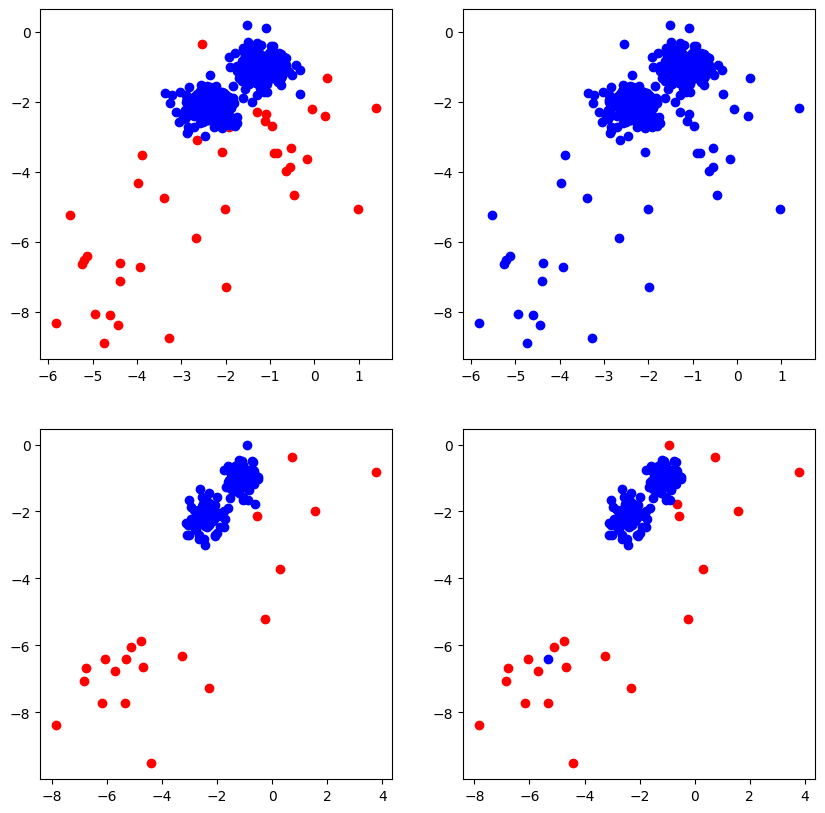

K =  1  --- balanced_accuracy =  0.9467943602021814


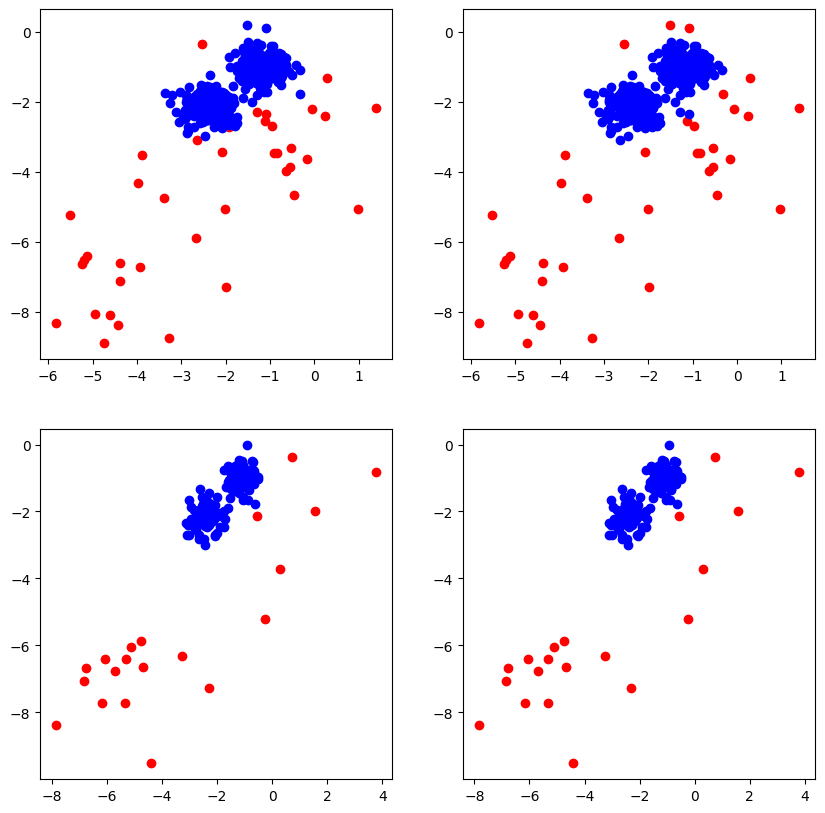

K =  5  --- balanced_accuracy =  0.9761904761904762


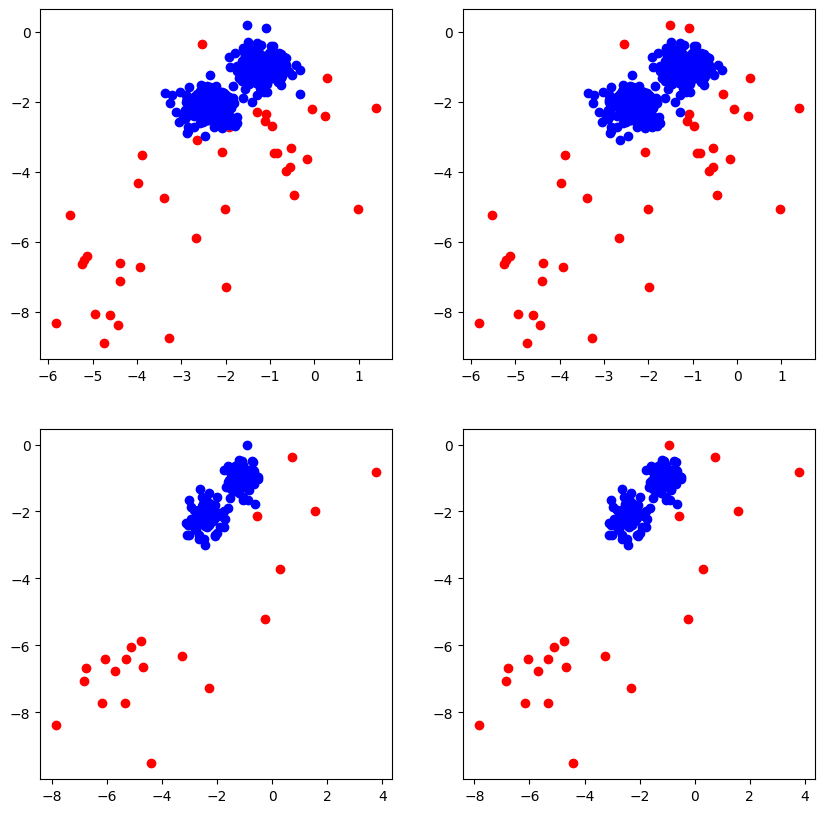

K =  9  --- balanced_accuracy =  0.9733971801010907


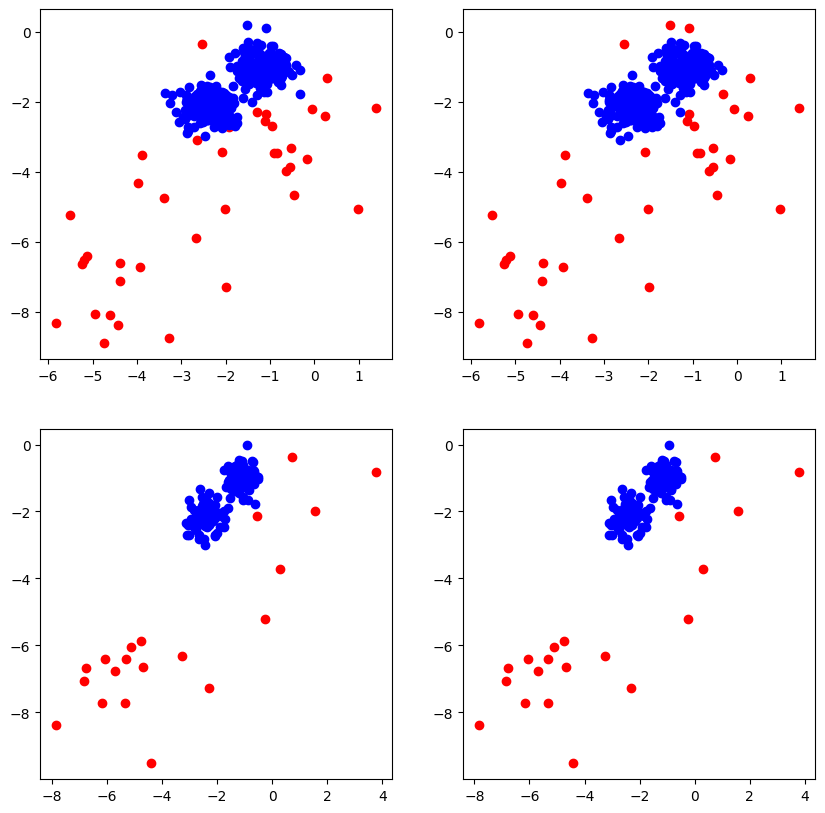

K =  13  --- balanced_accuracy =  0.9761904761904762


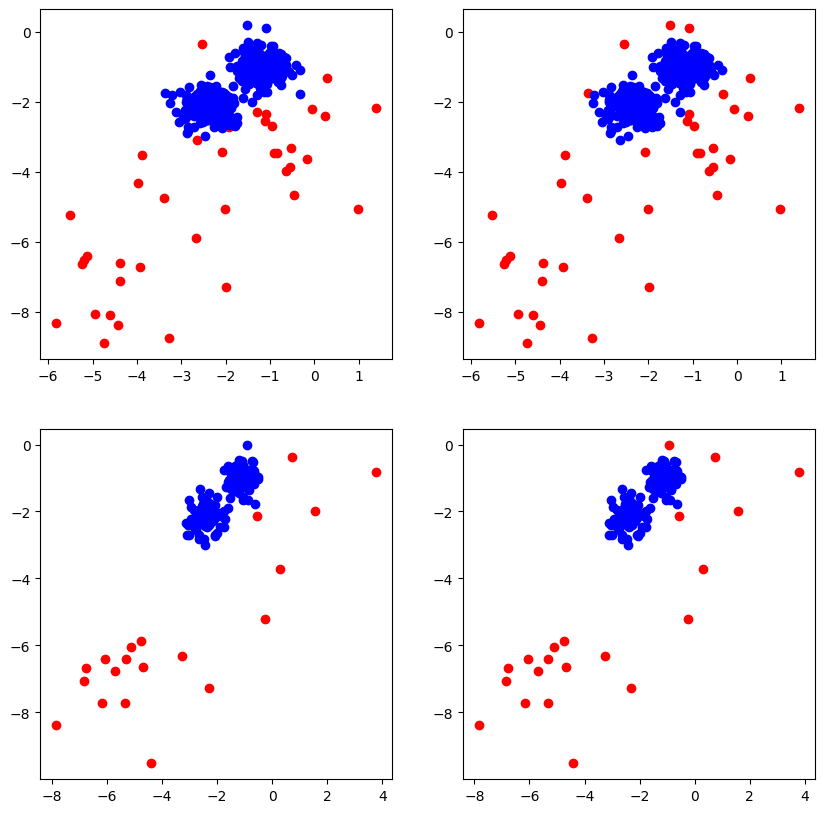

K =  17  --- balanced_accuracy =  0.9733971801010907


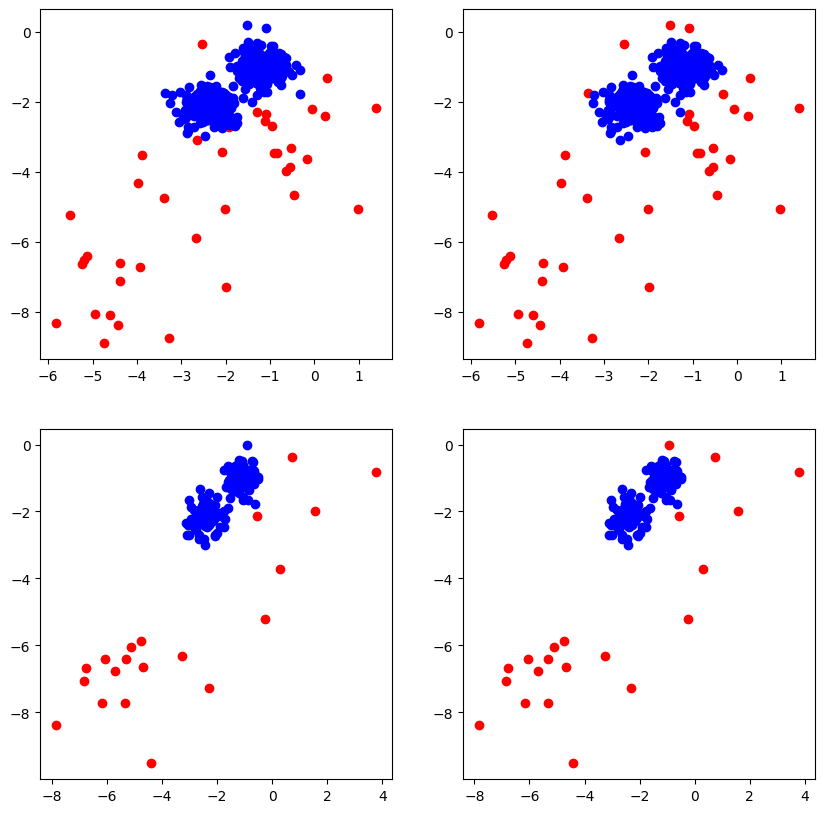

K =  21  --- balanced_accuracy =  0.9733971801010907


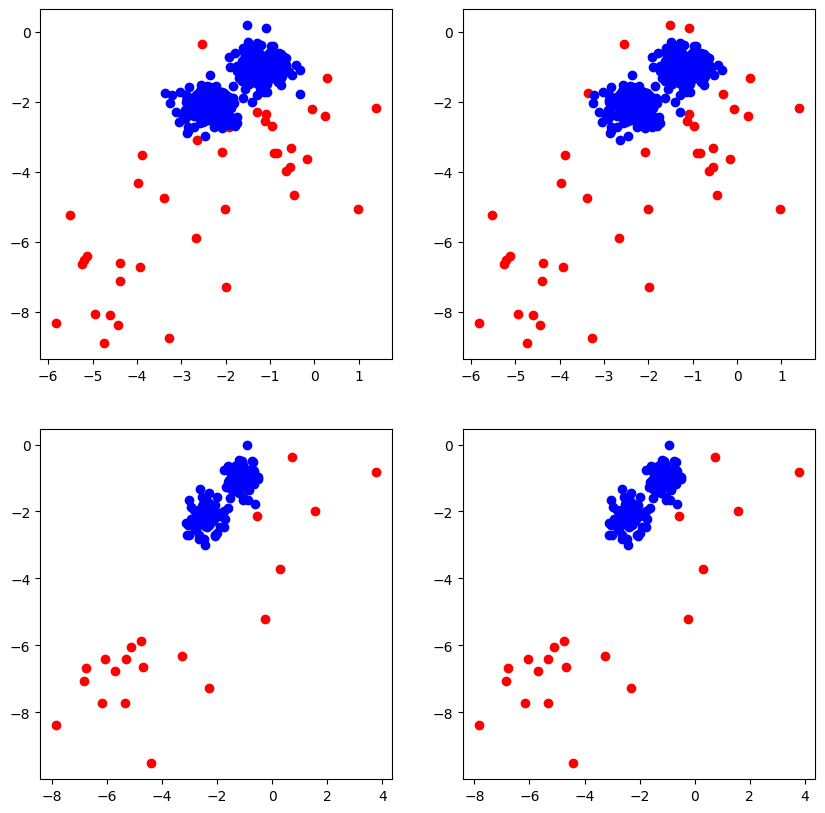

K =  25  --- balanced_accuracy =  0.9761904761904762


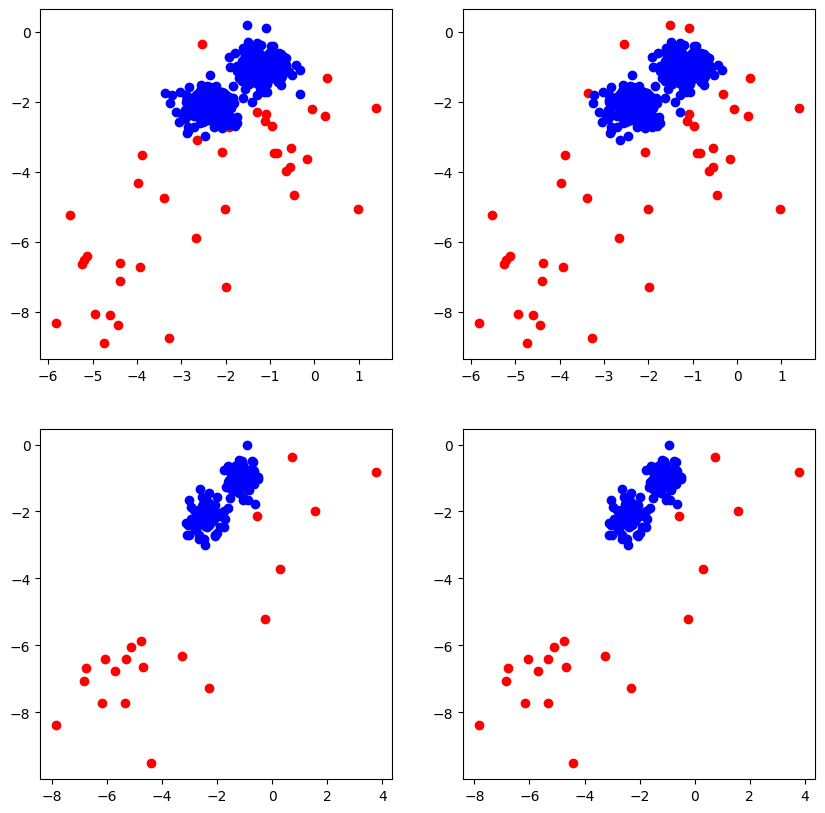

K =  29  --- balanced_accuracy =  0.9761904761904762


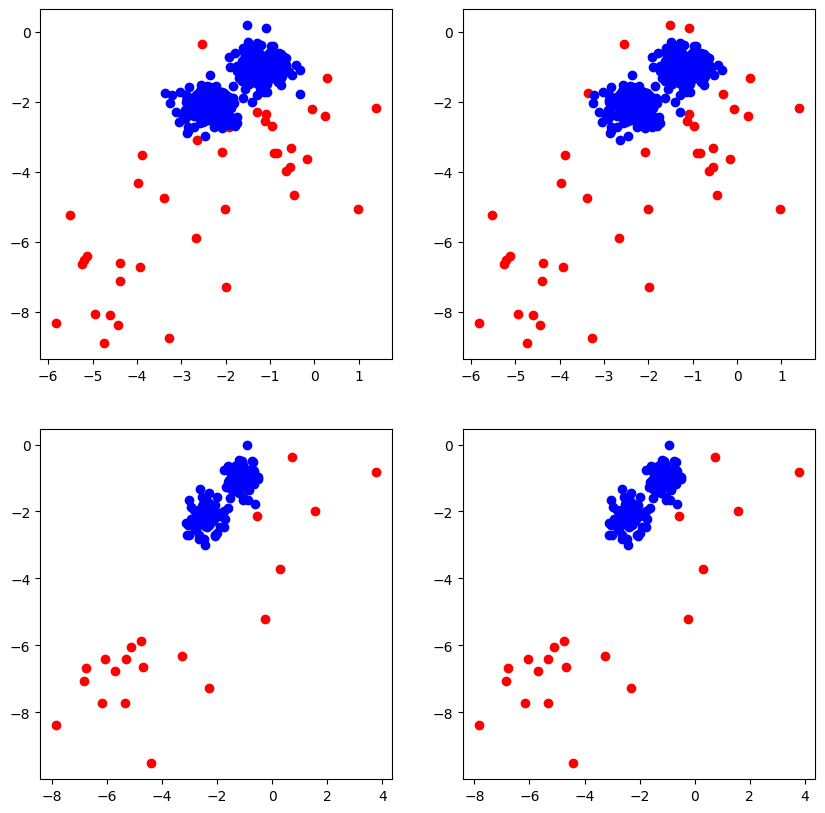

K =  33  --- balanced_accuracy =  0.9761904761904762


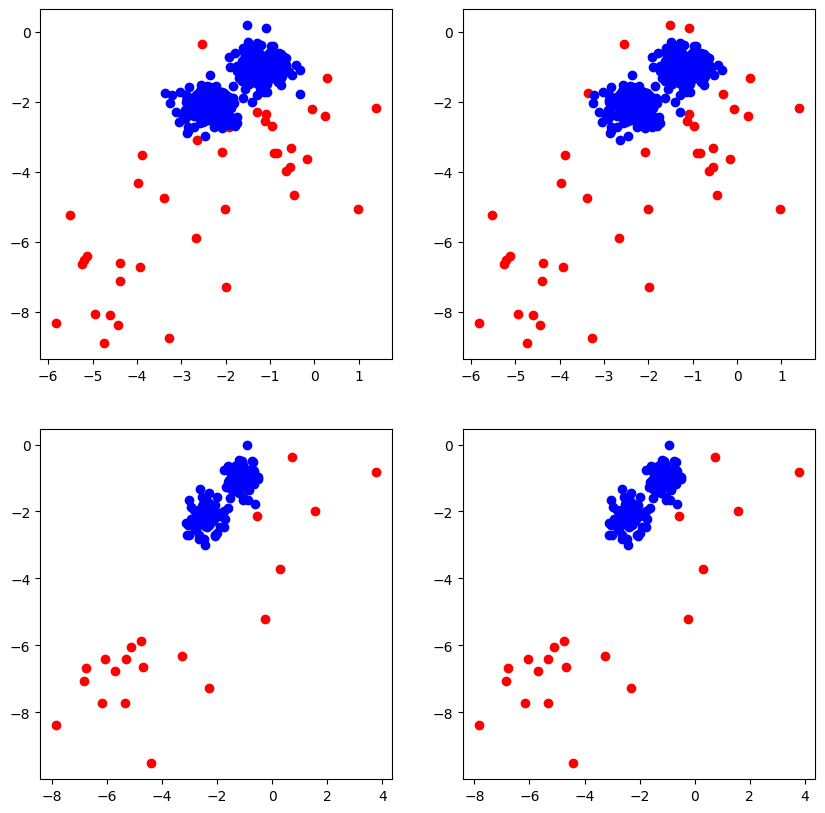

K =  37  --- balanced_accuracy =  0.9761904761904762


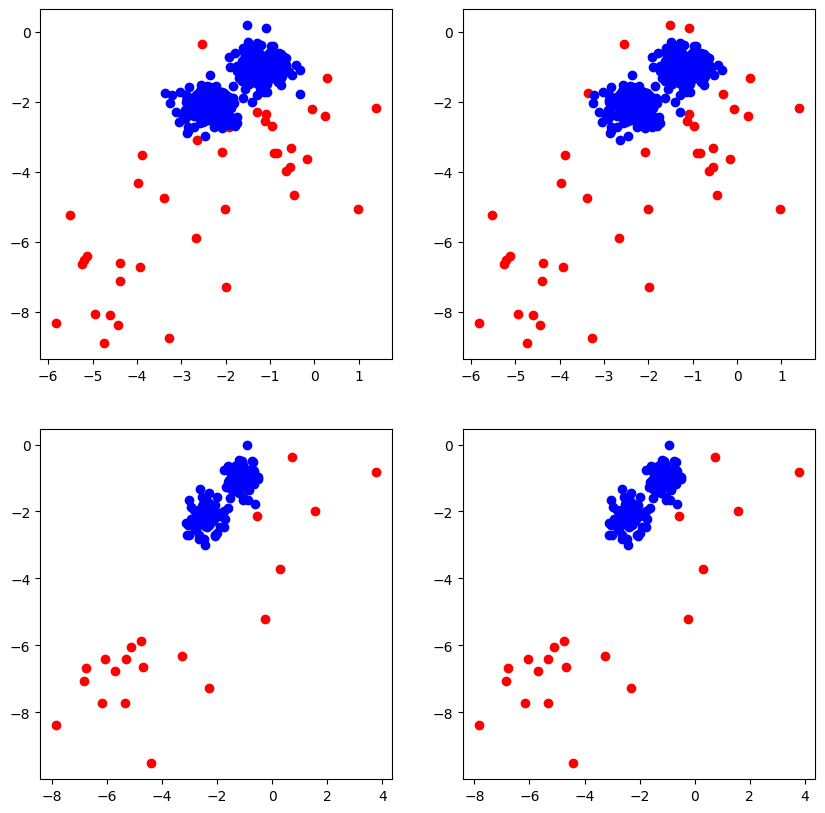

K =  41  --- balanced_accuracy =  0.9761904761904762


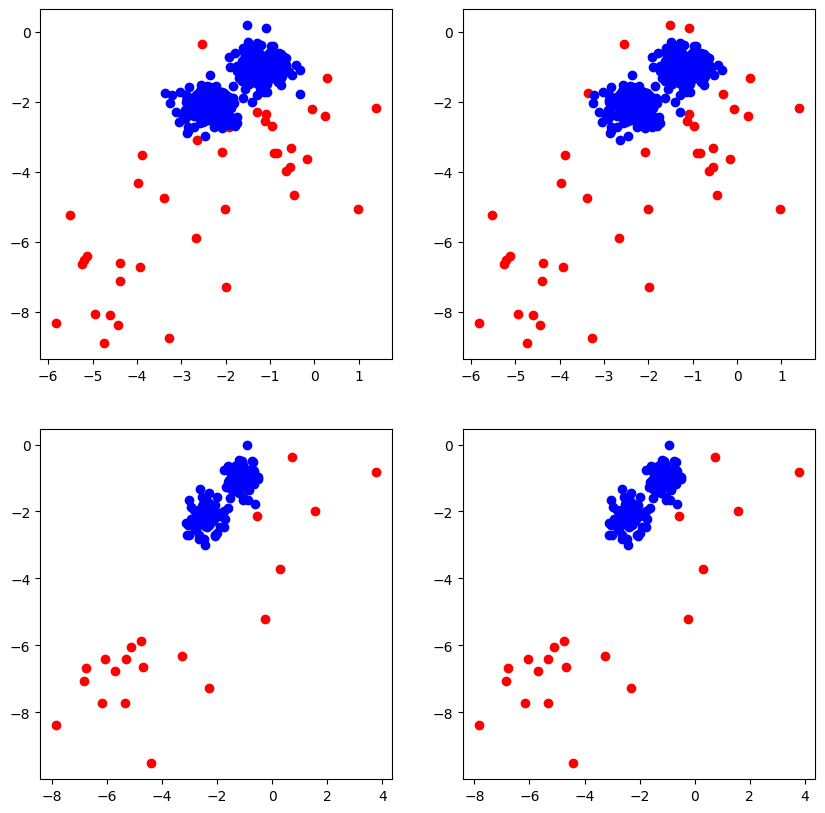

K =  45  --- balanced_accuracy =  0.9761904761904762


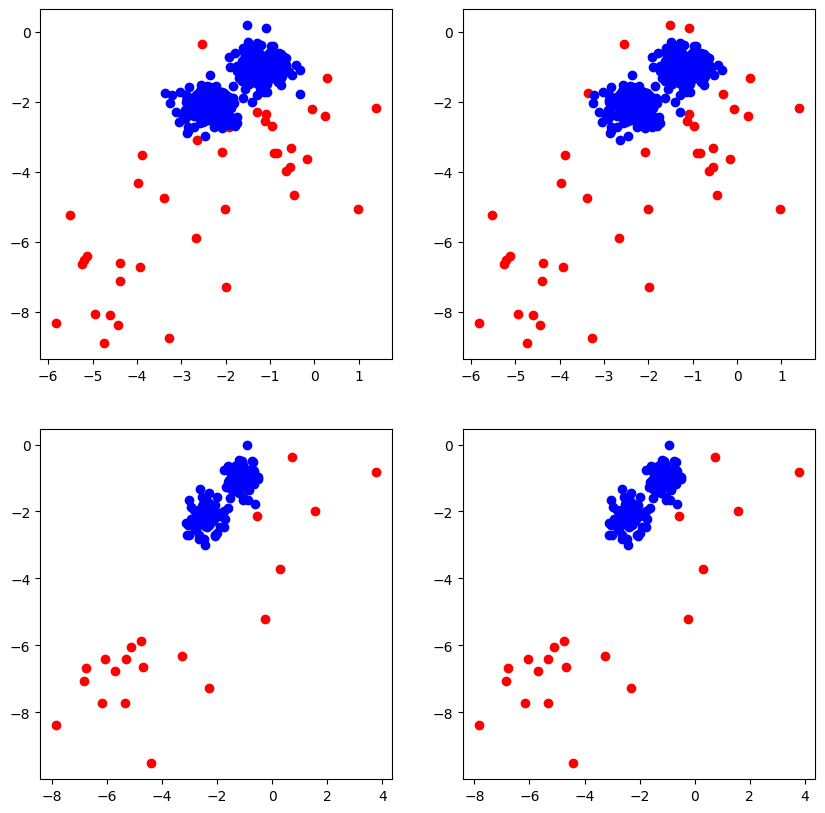

K =  49  --- balanced_accuracy =  0.9761904761904762


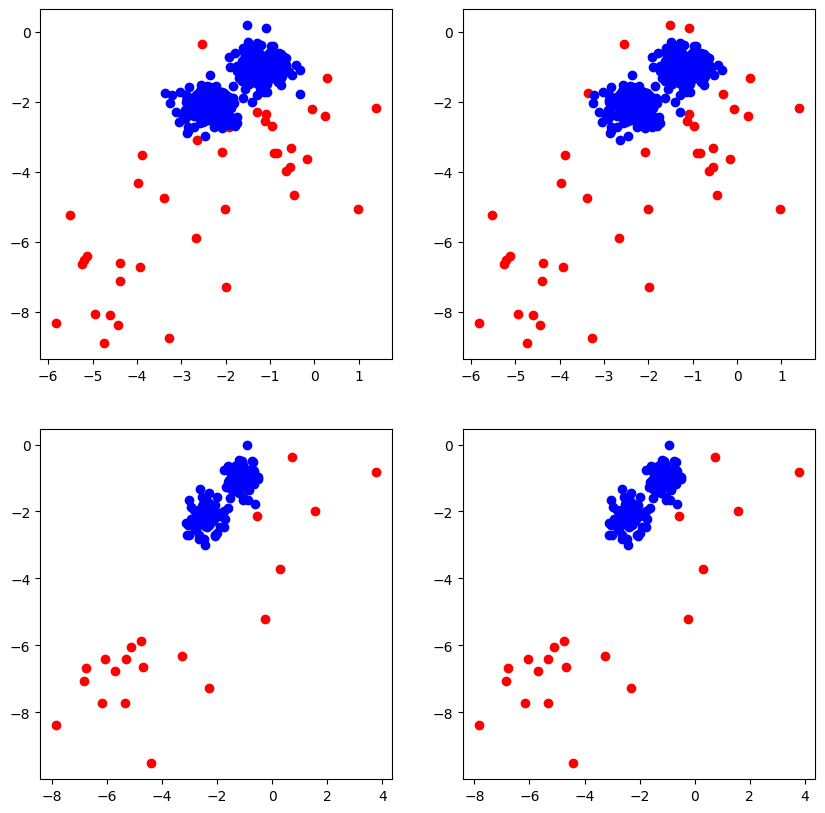

K =  53  --- balanced_accuracy =  0.9761904761904762


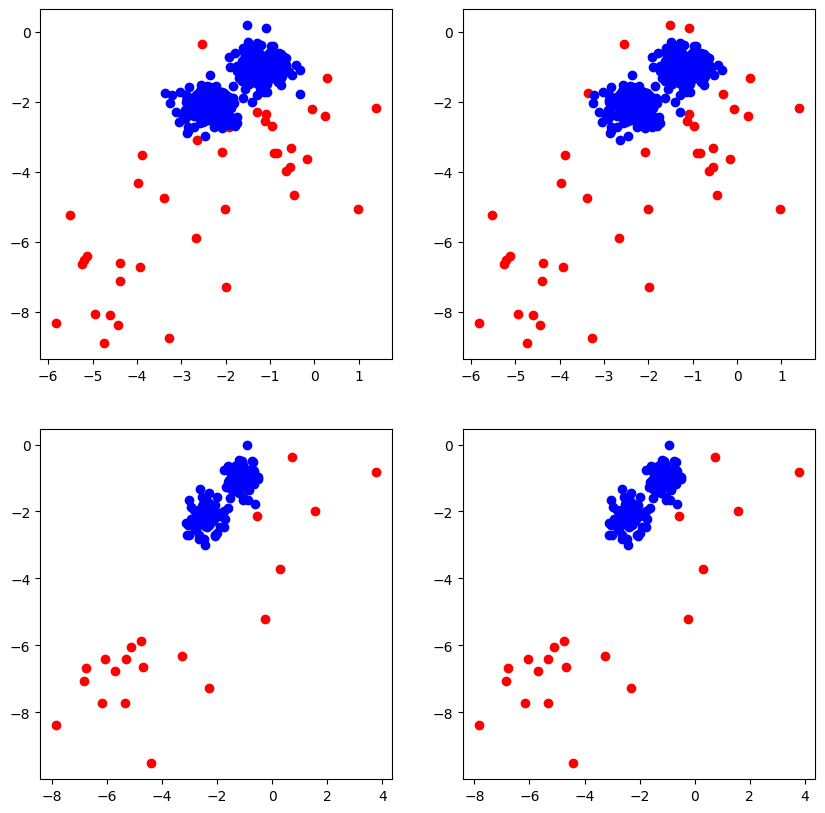

K =  57  --- balanced_accuracy =  0.9761904761904762


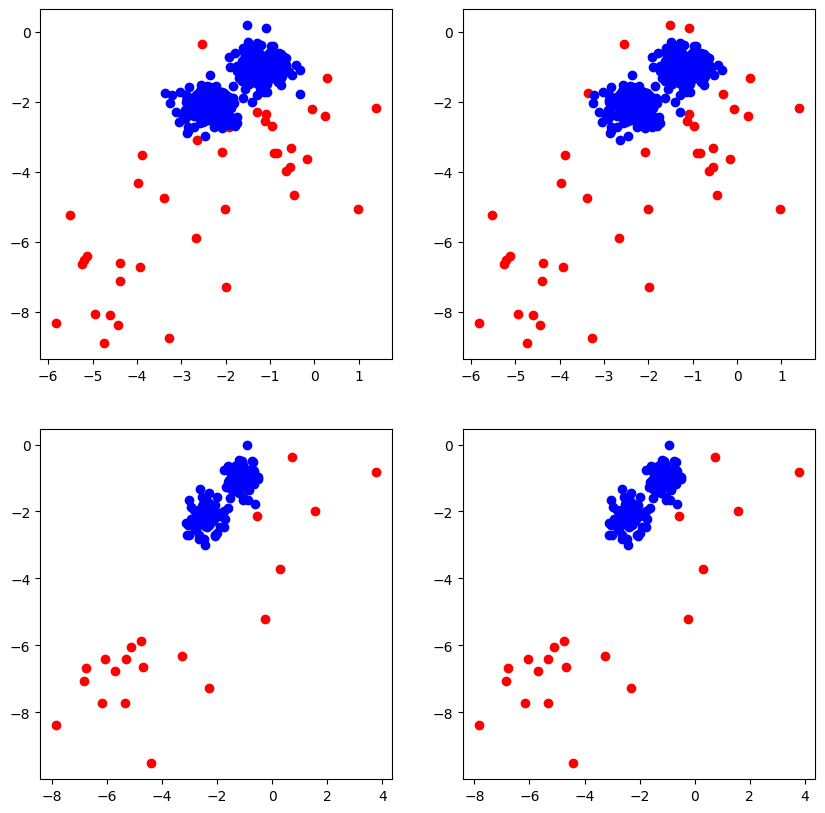

K =  61  --- balanced_accuracy =  0.9761904761904762


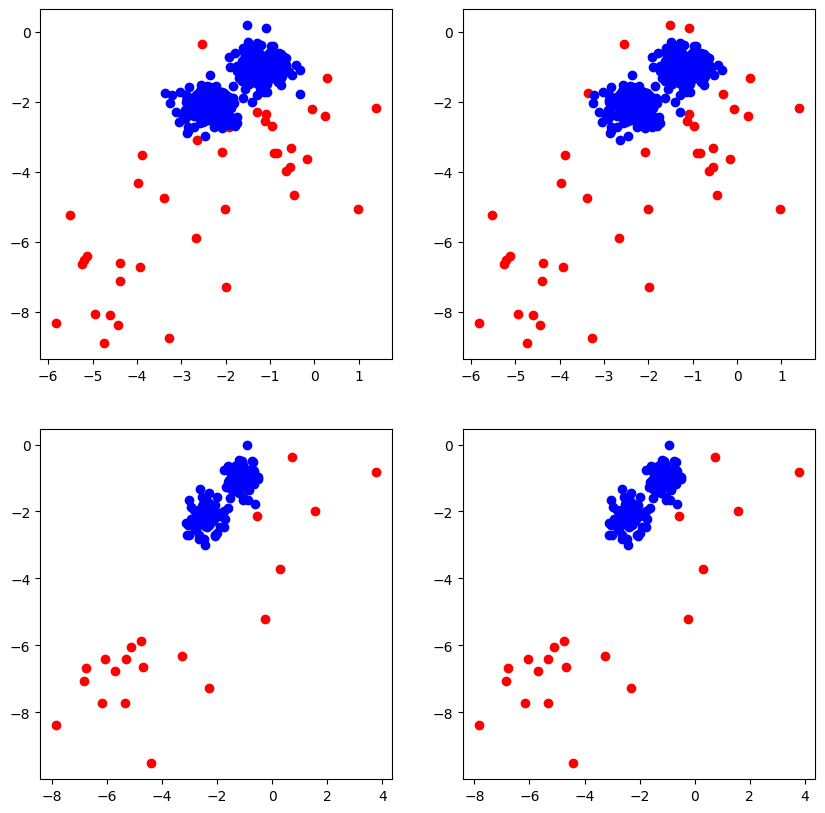

K =  65  --- balanced_accuracy =  0.9761904761904762


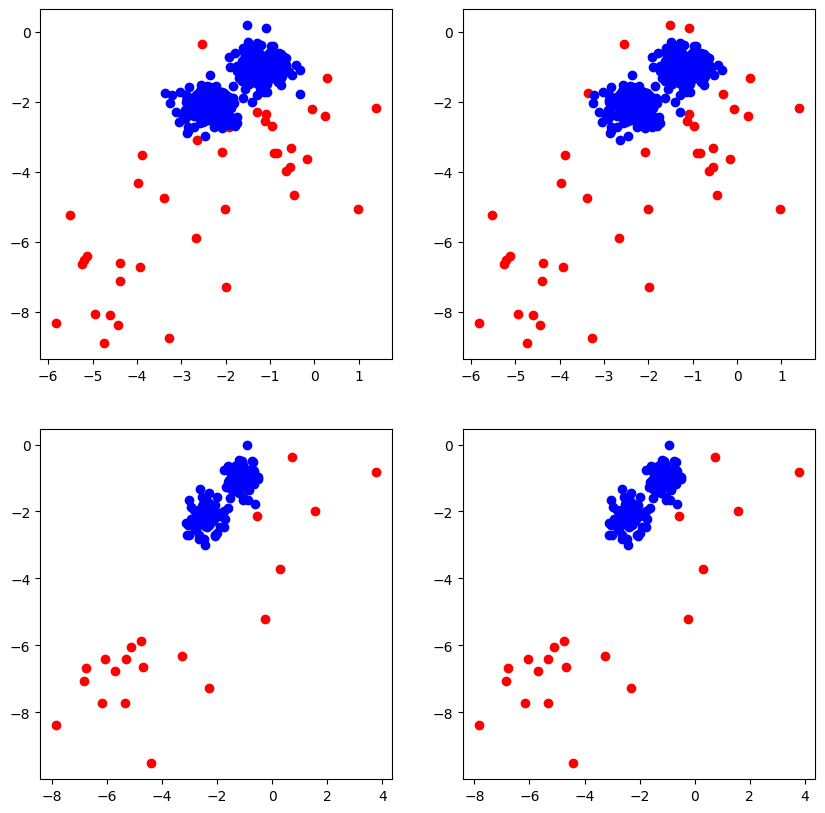

K =  69  --- balanced_accuracy =  0.9761904761904762


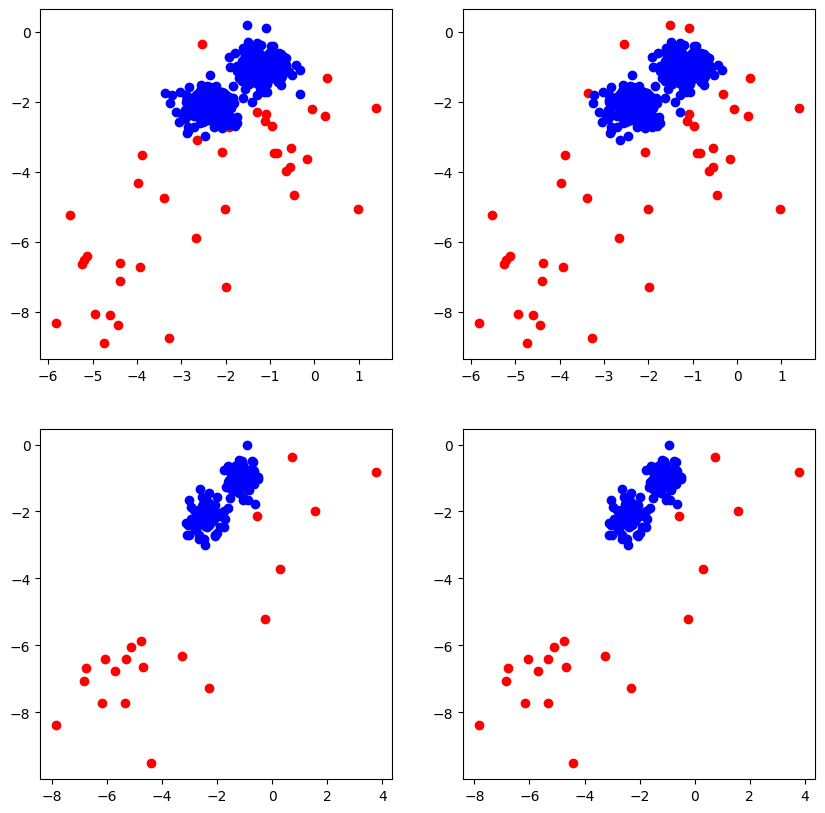

K =  73  --- balanced_accuracy =  0.9761904761904762


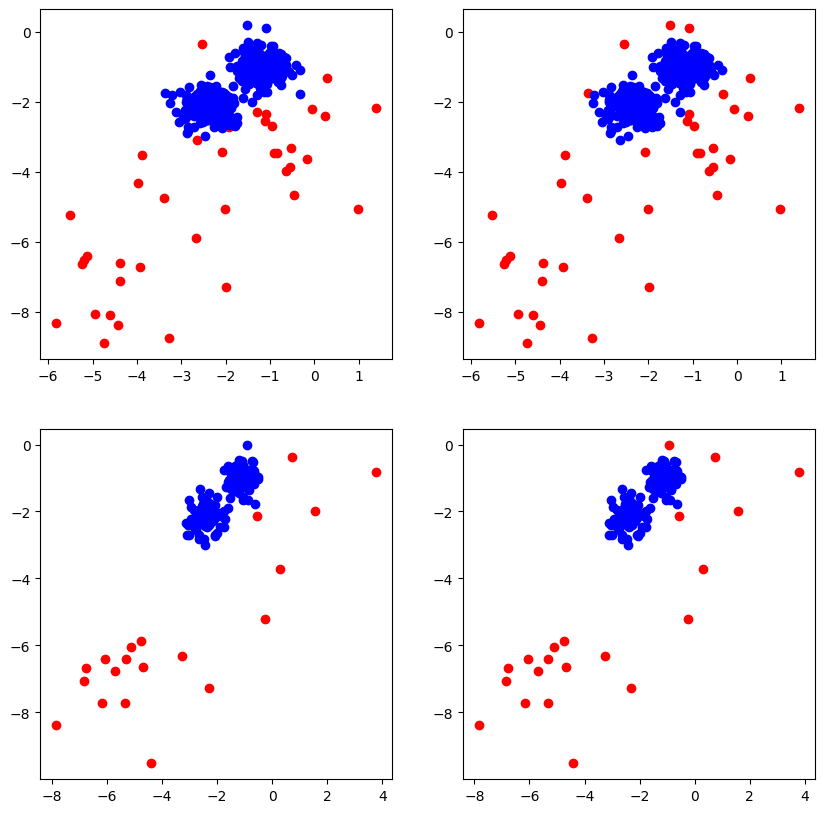

K =  77  --- balanced_accuracy =  0.9733971801010907


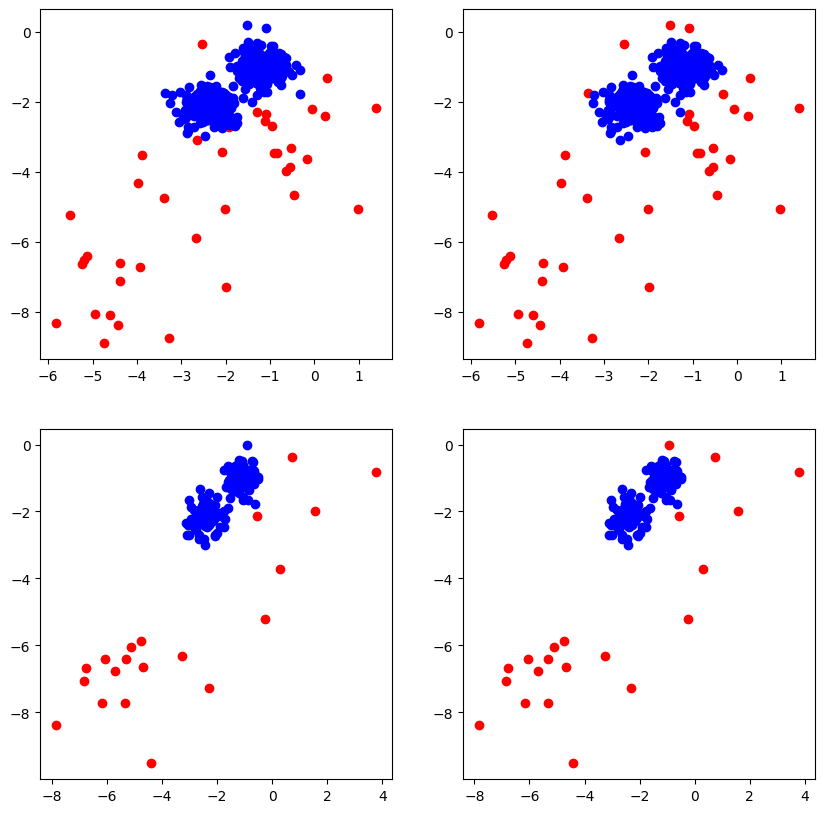

K =  81  --- balanced_accuracy =  0.9733971801010907


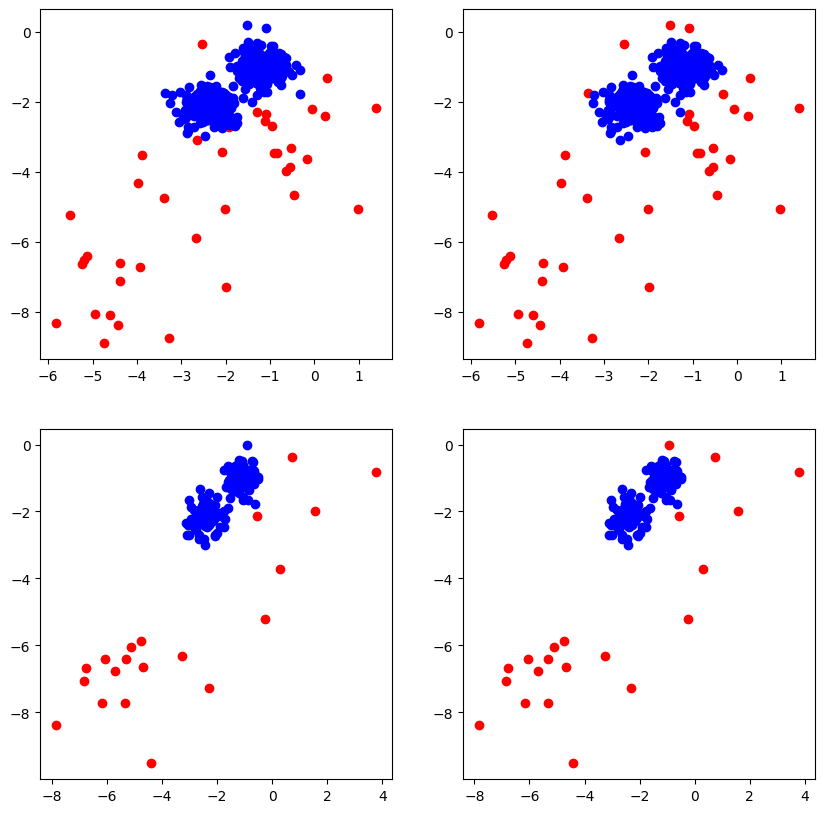

K =  85  --- balanced_accuracy =  0.9733971801010907


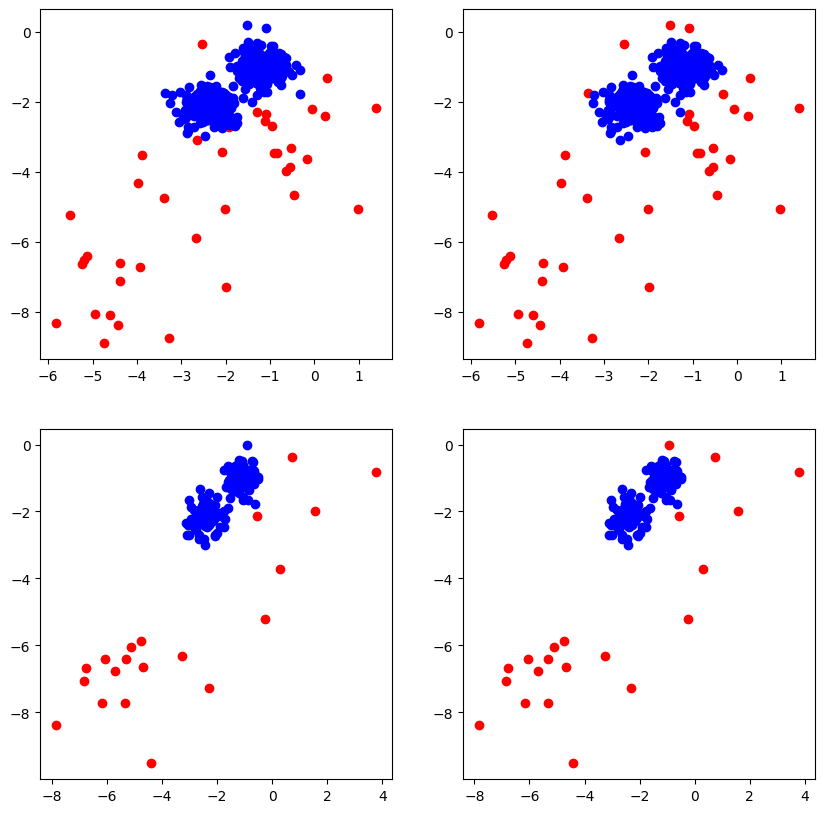

K =  89  --- balanced_accuracy =  0.9733971801010907


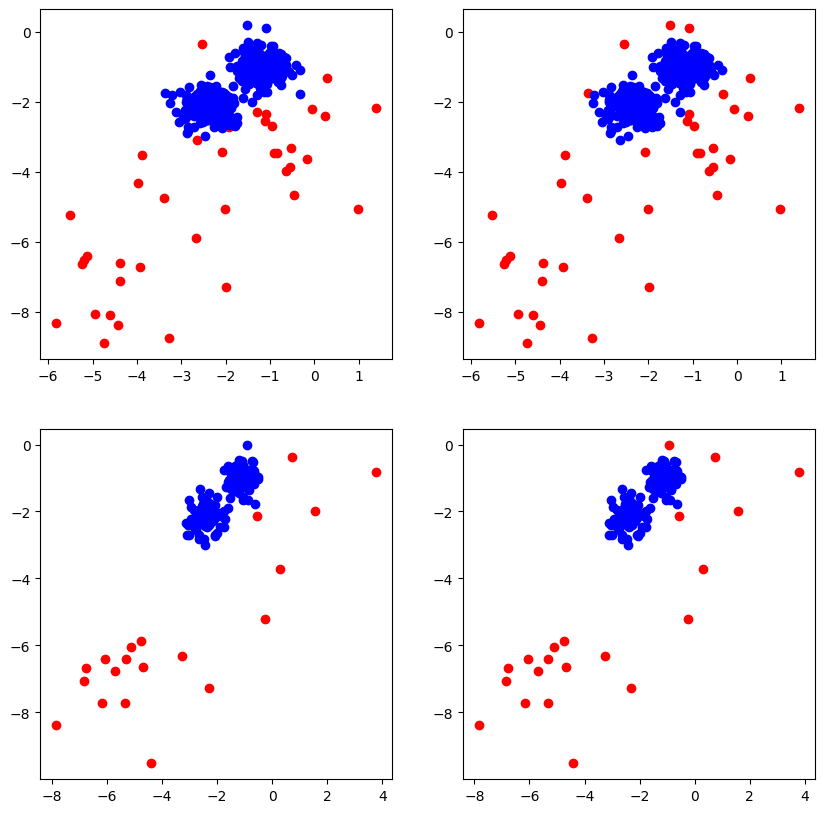

K =  93  --- balanced_accuracy =  0.9733971801010907


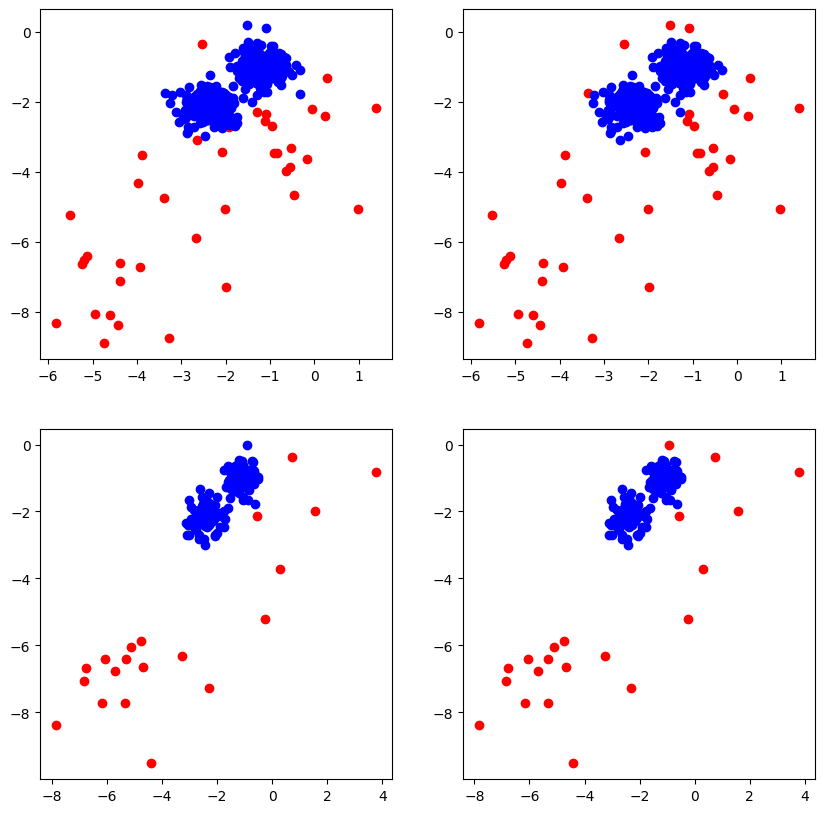

K =  97  --- balanced_accuracy =  0.9733971801010907


In [55]:
# Ex 2
contamination = 0.1
X_train, X_test, y_train, y_test = generate_data_clusters(400, 200, contamination=contamination)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
for n_neighbors in range(1, 100, 4):
    model = knn.KNN(contamination=contamination, n_neighbors=n_neighbors)
    model.fit(X_train)

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    fig, axs = plt.subplots(2, 2, figsize=(10, 10))
    axs[0, 0].scatter(X_train[y_train==1,0], X_train[y_train==1,1], c='red')
    axs[0, 0].scatter(X_train[y_train==0,0], X_train[y_train==0,1], c='blue')

    axs[0, 1].scatter(X_train[pred_train==1,0], X_train[pred_train==1,1], c='red')
    axs[0, 1].scatter(X_train[pred_train==0,0], X_train[pred_train==0,1], c='blue')

    axs[1, 0].scatter(X_test[y_test==1,0], X_test[y_test==1,1], c='red')
    axs[1, 0].scatter(X_test[y_test==0,0], X_test[y_test==0,1], c='blue')

    axs[1, 1].scatter(X_test[pred_test==1,0], X_test[pred_test==1,1], c='red')
    axs[1, 1].scatter(X_test[pred_test==0,0], X_test[pred_test==0,1], c='blue')
    plt.show()
    balanced_accuracy = balanced_accuracy_score(y_test, pred_test)
    print("K = ", n_neighbors, " --- balanced_accuracy = ", balanced_accuracy)

    # When k becomes greater than the anomaly cluster, it can start shifting the 
    # results towards false negatives (it will take into consideration inlier
    # datapoints as well).

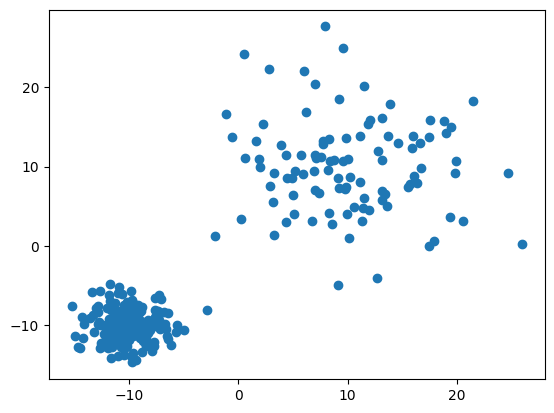

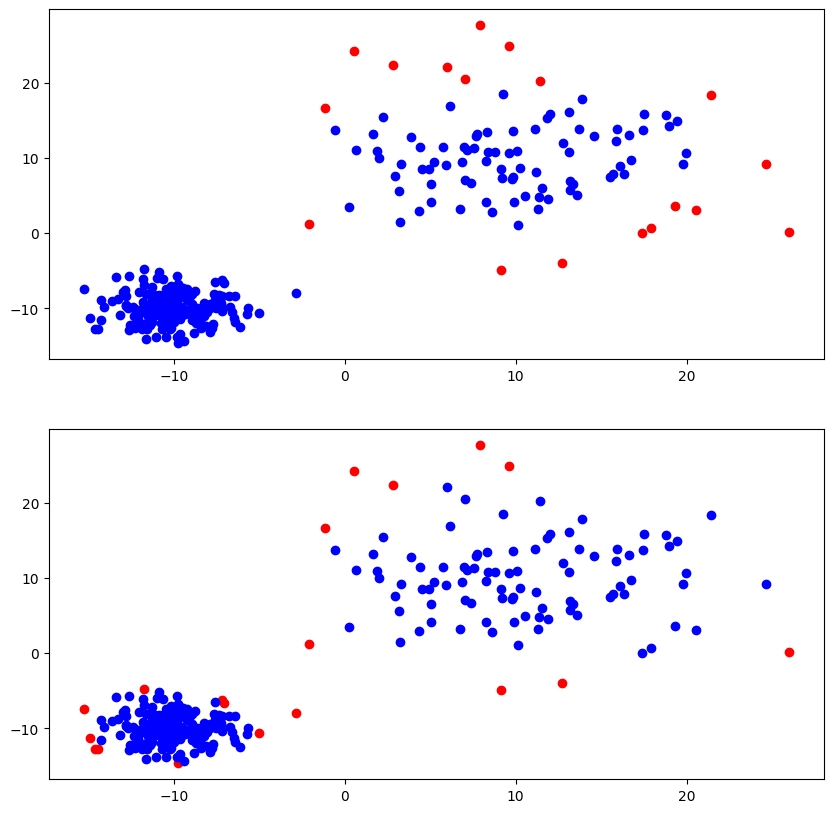

In [56]:
# Ex 3
clusters, cluster_labels = make_blobs(
    n_samples=[200, 100],
    n_features=2,
    centers=[
        [-10, -10],
        [10, 10]
    ],
    cluster_std=[2, 6],
)

plt.scatter(clusters[:,0], clusters[:,1])
plt.show()

knn_model = knn.KNN(contamination=0.07)
knn_model.fit(clusters)
lof_model = lof.LOF(contamination=0.07)
lof_model.fit(clusters)

knn_preds = knn_model.predict(clusters)
lof_preds = lof_model.predict(clusters)

fig, axs = plt.subplots(2, 1, figsize=(10, 10))
axs[0].scatter(clusters[knn_preds==1, 0], clusters[knn_preds==1, 1], c='red')
axs[0].scatter(clusters[knn_preds==0, 0], clusters[knn_preds==0, 1], c='blue')
axs[1].scatter(clusters[lof_preds==1, 0], clusters[lof_preds==1, 1], c='red')
axs[1].scatter(clusters[lof_preds==0, 0], clusters[lof_preds==0, 1], c='blue')

In [132]:
# Ex 4
mat = loadmat("lab2_4")
X_train, X_test, y_train, y_test = train_test_split(mat['X'], mat['y'], train_size=0.8)
X_train, X_test = standardizer(X_train, X_test)
contamination = y_train[y_train==1].shape[0]/y_train.shape[0]
n_neighbors_min, n_neighbors_max = 30, 120

def processModel(modelConstructor):
    train_scores, test_scores = [], []
    for n_neighbors in range(n_neighbors_min, n_neighbors_max+1, 10):
        model = modelConstructor(n_neighbors=n_neighbors, contamination=contamination)
        model.fit(X_train)

        train_score = model.decision_function(X_train).reshape(-1, 1)
        test_score = model.decision_function(X_test).reshape(-1, 1)
        train_score_norm, test_score_norm = standardizer(train_score, test_score)
        train_scores.append(train_score_norm.reshape(-1))
        test_scores.append(test_score_norm.reshape(-1))

        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)
        test_ba = balanced_accuracy_score(y_test, y_test_pred)
        train_ba = balanced_accuracy_score(y_train, y_train_pred)

        print("For ", n_neighbors, " neighbors")
        print("\ttrain balanced accuracy: ", train_ba)
        print("\ttest balanced accuracy: ", test_ba)
    
    train_scores = np.array(train_scores).T
    test_scores = np.array(test_scores).T

    avg_scores = average(test_scores)
    max_scores = maximization(test_scores)

    avg_threshold = np.quantile(avg_scores, 1-contamination)
    max_threshold = np.quantile(max_scores, 1-contamination)

    avg_preds = (avg_scores > avg_threshold).astype(np.int8)
    max_preds = (max_scores > max_threshold).astype(np.int8)

    avg_ba = balanced_accuracy_score(y_test, avg_preds)
    max_ba = balanced_accuracy_score(y_test, max_preds)

    print("Balanced accuracy for average method: ", avg_ba)
    print("Balanced accuracy for maximization method: ", max_ba)


processModel(lof.LOF)
processModel(knn.KNN)

For  30  neighbors
	train balanced accuracy:  0.5354771004140875
	test balanced accuracy:  0.5387647821911274
For  40  neighbors
	train balanced accuracy:  0.5317911169598447
	test balanced accuracy:  0.531477444736719
For  50  neighbors
	train balanced accuracy:  0.5311507469915236
	test balanced accuracy:  0.5324842088247561
For  60  neighbors
	train balanced accuracy:  0.5391156965103863
	test balanced accuracy:  0.536344273884383
For  70  neighbors
	train balanced accuracy:  0.5338932065570384
	test balanced accuracy:  0.5297482307125809
For  80  neighbors
	train balanced accuracy:  0.5302311040446214
	test balanced accuracy:  0.526328258072362
For  90  neighbors
	train balanced accuracy:  0.5285456595131599
	test balanced accuracy:  0.526328258072362
For  100  neighbors
	train balanced accuracy:  0.5292942427711118
	test balanced accuracy:  0.5248502459114225
For  110  neighbors
	train balanced accuracy:  0.5294860393571326
	test balanced accuracy:  0.5244651650444404
For  120  ne